In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
X_scaled = StandardScaler().fit_transform(X)

In [7]:
X_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns = ['PC1', 'PC2'])
X_pca

,PC1,PC2
0,0.624111,2.321270
1,-0.455988,-0.957351
2,-1.828805,0.042885
3,-1.716006,-0.495337
4,-0.371356,0.301156
...,...,...
298,1.146672,-0.519529
299,-0.708593,-1.045752
300,2.459005,0.478262
301,1.762755,-2.336816


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.1)

In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.7096774193548387


In [11]:
finalDf = pd.concat([X_pca, df[['target']]], axis = 1)

In [12]:
X = finalDf.iloc[:,:-1]
y = finalDf.iloc[:,-1]


In [13]:
X_train.shape

(272, 2)

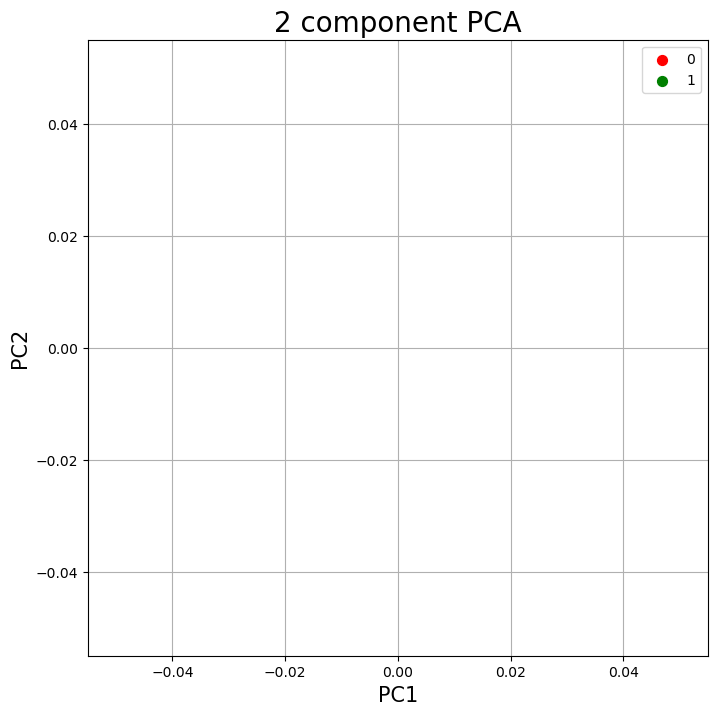

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['0', '1']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [17]:
X

,PC1,PC2
0,0.624111,2.321270
1,-0.455988,-0.957351
2,-1.828805,0.042885
3,-1.716006,-0.495337
4,-0.371356,0.301156
...,...,...
298,1.146672,-0.519529
299,-0.708593,-1.045752
300,2.459005,0.478262
301,1.762755,-2.336816


In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
df.shape

(303, 14)

In [22]:
X = df.drop('target', axis=1) #independent columns
y = df['target']   #target column

In [23]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#apply SelectKBest class to extract top 10 best features
test = SelectKBest(score_func= f_classif)
test.fit(X,y)
scores= pd.DataFrame(test.scores_)
columns = pd.DataFrame(X.columns)

featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,age,16.116700
1,sex,25.792191
2,cp,69.772271
3,trestbps,6.458169
4,chol,2.202983
5,fbs,0.236942
6,restecg,5.777209
7,thalach,65.120104
8,exang,70.952438
9,oldpeak,68.551439


In [24]:
print(featureScores.nlargest(10,'Score'))

       Specs      Score
8      exang  70.952438
2         cp  69.772271
9    oldpeak  68.551439
7    thalach  65.120104
11        ca  54.559834
10     slope  40.902071
12      thal  40.407696
1        sex  25.792191
0        age  16.116700
3   trestbps   6.458169


In [28]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = load_diabetes()
X = df.data
y= df.target
X.shape

(442, 10)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
# Lasso
reg = Lasso(alpha=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [34]:
print(reg.coef_)
print(reg.intercept_)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

[  -1.35972089 -192.93718018  526.35651446  332.6411011  -430.22697505
  191.29547987  -44.03491271   68.98898658  688.39602778   47.94061621]
151.87686450031345
R2 score 0.44111855963110613
RMSE 55.568975580213966


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
%matplotlib inline

In [56]:
df = pd.read_csv('emails.csv')

In [57]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [58]:
df.shape

(5728, 2)

In [59]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

<Axes: xlabel='spam', ylabel='count'>

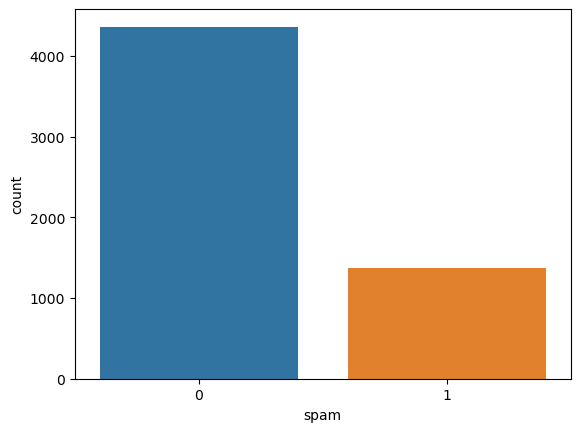

In [60]:
seaborn.countplot(x='spam',data=df)

In [61]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [62]:
X= df.text.values
y= df.spam.values

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X_vectorized=cv.fit_transform(X)
X_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [64]:
#Dataset splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_vectorized,y,test_size=.25,random_state=1)

In [65]:
from sklearn.naive_bayes import MultinomialNB

#Create a Gaussian Classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred=mnb.predict(X_test)

In [66]:
print("Accuracy score: ", accuracy_score(y_test,pred))

Accuracy score:  0.9916201117318436


In [67]:
confusion_matrix(y_test,pred)

array([[1076,    7],
       [   5,  344]], dtype=int64)

In [68]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1083
           1       0.98      0.99      0.98       349

    accuracy                           0.99      1432
   macro avg       0.99      0.99      0.99      1432
weighted avg       0.99      0.99      0.99      1432



Text(0.5, 427.9555555555555, 'Predicted label')

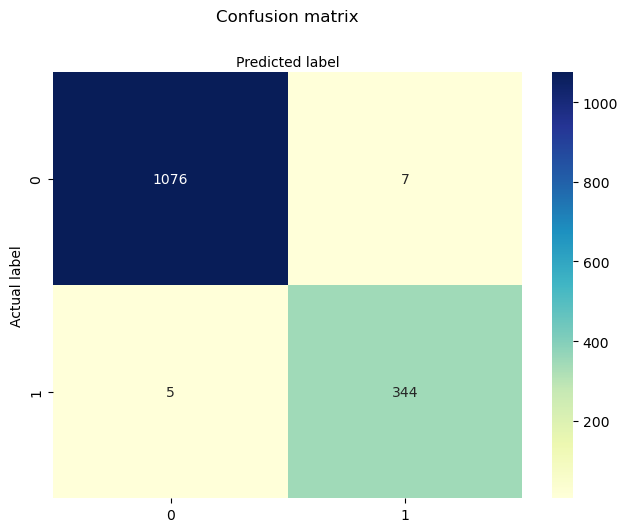

In [69]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
seaborn.heatmap(pd.DataFrame(confusion_matrix(y_test,pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [70]:
import pandas as pd
from sklearn.metrics import accuracy_score

In [71]:
import warnings
warnings.filterwarnings("ignore")

In [72]:
X = df.iloc[:,1:3]
y = df.iloc[:,-1]
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [73]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [74]:
# K-Fold
logr1=LogisticRegression()
score=cross_val_score(logr1,X,y,cv=5)

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation (Test data accuracy): {}".format(score.mean()))

Cross Validation Scores are [1. 1. 1. 1. 1.]
Average Cross Validation (Test data accuracy): 1.0


In [75]:
#Stratified KFold is used for imbalanced data

logr2=LogisticRegression()
score=cross_val_score(logr2,X,y,cv= StratifiedKFold(5))

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation (Test data accuracy): {}".format(score.mean()))


Cross Validation Scores are [1. 1. 1. 1. 1.]
Average Cross Validation (Test data accuracy): 1.0
